In [1]:
import numpy as np
import itertools  
import pandas as pd
full_values = [(5248, 640),
                   (1312, 1888),
                   (2624, 3776),
                   (5760, 3776),
                   (3936, 5664)] #list of elements
A=[el[0] for el in full_values]
print(A)
B=[el[1] for el in full_values]
print(B)
print("Suma A:",sum([el[0] for el in full_values]),"Suma B:",sum([el[1] for el in full_values]))

[5248, 1312, 2624, 5760, 3936]
[640, 1888, 3776, 3776, 5664]
Suma A: 18880 Suma B: 15744


In [2]:
def m_value(A,B,i):
    x1=[a for a in range(1,A[i]+1)]   #all possible x (errors in "A")
    y1=[b for b in range(1,B[i]+1)] #all possible y (errors in "B")
    c = list(itertools.product(x1, y1))
    df_t=pd.DataFrame(c,columns=["Xi","Yi"])
    df_t["m"]=np.array([A[i]/B[i]*v[1]/v[0] for v in c ]) #all pairs x,y  and m ratio 
    return df_t

In [3]:
# 5 groups of xi,yi pairs where m>1 
ll=[m_value(A,B,i) for i in range(0,5)]
for i in range(0,len(ll)):
    ll[i]=ll[i][ll[i]["m"]>1] #according to Project_Euler
# consired only m appearing in all 5 groups
m_candidates=ll[0][(ll[0]["m"].isin(ll[1]["m"].unique())) & (ll[0]["m"].isin(ll[2]["m"].unique())) 
                   & (ll[0]["m"].isin(ll[3]["m"].unique()) 
                    & (ll[0]["m"].isin(ll[4]["m"].unique())))]["m"]

In [ ]:
# code to find all 35 values (it takes long to execute):
ANS=[]
for num,m in enumerate(sorted(m_candidates.unique(),reverse=True)):  #możliwe m we wszsytkich
    print(f"TEST dla {m}, #{num+1}/{m_candidates.unique().shape[0]}")
    
    aa= ll[0][(ll[0]["m"]==m)]["Yi"].unique()
    bb= ll[1][(ll[1]["m"]==m)]["Yi"].unique()
    cc= ll[2][(ll[2]["m"]==m)]["Yi"].unique()
    dd= ll[3][(ll[3]["m"]==m)]["Yi"].unique()
    ee= ll[4][(ll[4]["m"]==m)]["Yi"].unique()

    test_value = np.array(list(itertools.product(aa,bb,cc,dd,ee)))
    print(len(test_value))
    arr=np.sqrt(np.dot(test_value,(np.array(A)/np.array(B)))/(test_value.sum(axis=1)))
    if arr[arr==m].sum()>0:
        for rozw in list(test_value[arr==m]):
                print(f"{m} for set {tuple(rozw)}")
                ANS.append((m,tuple(rozw)))  
print(ANS)

Pełne przejście kodu przy dostepnych zasobach trwałoby bardzo długo. Poniżej załączony zostaje
wycinek z pierwszą poprawną wartością m => 81/944. W ten sam sposób można odnaleźć pozostałe 34; 
jest to kwestia przejrzenia całej (skończonej) przestrzeni rozwiązań.

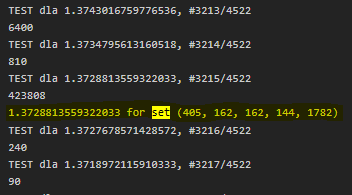